## 1. Setup Environment and Google Drive Connection

In [ ]:
import os
import shutil
from datetime import datetime
import time


from google.colab import drive
drive.mount('/content/drive')
print("✅ Google Drive has been connected successfully.")

!pip install -q roboflow ultralytics supervision


print("Installing all required libraries for DETR...")
!pip install -q "datasets>=2.18.0" "transformers>=4.40.0" "torch" roboflow pillow

import os
import json
import torch
from roboflow import Roboflow
from datasets import Dataset, DatasetDict, Image
from collections import defaultdict
from transformers import DetrImageProcessor, DetrForObjectDetection, Trainer, TrainingArguments
from PIL import ImageDraw, ImageFont

print("\n✅ Setup complete. Google Drive is connected and libraries are installed.")


## 2. YOLOV8

### 2.1 Dataset for YOLOv8

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ROBOFLOW_API_KEY")
project = rf.workspace("bitirme-ykno4").project("market-nvgff")
version = project.version(3)
dataset_v8 = version.download("yolov8")


### 2.2 YOLOv8 Model Training

In [ ]:
data_v8_path = f"{dataset_v8.location}/data.yaml"

# Eğitimi başlat
print("🚀 YOLOv8 training is starting ...")
!yolo task=detect mode=train model=yolov8s.pt data='{data_v8_path}' epochs=50 imgsz=640 plots=True name=yolov8_train

print("✅ YOLOv8 trainin has been completed!")

### 2.3 Save the YOLOv8 Results

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv8_Results

!cp -r /content/runs/detect/yolov8_train /content/drive/MyDrive/YOLOv8_Results/

### 2.4 Predict for YOLOv8 Model

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv8_Results/weights/best.pt source=/content/market--3/test imgsz=640 name=yolov8_predict

### 2.5 Save the YOLOv8 Predict Results

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv8_Predict_Results

!cp -r /content/runs/detect/yolov8_predict /content/drive/MyDrive/YOLOv8_Predict_Results/

## 3. YOLOV9

### 3.1 Dataset for YOLOv9

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ROBOFLOW_API_KEY")
project = rf.workspace("bitirme-ykno4").project("market-nvgff")
version = project.version(3)
dataset_v9 = version.download("yolov9")

### 3.2 YOLOv9 Model Training

In [ ]:
data_v9_path = f"{dataset_v9.location}/data.yaml"

# Eğitimi başlat
print("🚀 YOLOv9 training is starting ...")
!yolo task=detect mode=train model=yolov9c.pt data='{data_v9_path}' epochs=50 imgsz=640 plots=True name=yolov9_train

print("✅ YOLOv9 trainin has been completed!")

### 3.3 Save the YOLOv9 Results

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv9_Results

!cp -r /content/runs/detect/yolov9_train /content/drive/MyDrive/YOLOv9_Results/

### 3.4 Predict for YOLOv9 Model

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv9_Results/weights/best.pt source=/content/market--3/test imgsz=640 name=yolov9_predict

### 3.5 Save the YOLOv9 Predict Results

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv9_Predict_Results

!cp -r /content/runs/detect/yolov9_predict /content/drive/MyDrive/YOLOv9_Predict_Results/

## 4. YOLOv10

### 4.1 Dataset for YOLOv10

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ROBOFLOW_API_KEY")
project = rf.workspace("bitirme-ykno4").project("market-nvgff")
version = project.version(3)
dataset_v10 = version.download("yolov8")

### 4.2 YOLOv10 Model Training

In [ ]:
data_v10_path = f"{dataset_v10.location}/data.yaml"

print("🚀 YOLOv10 training is starting ...")
!yolo task=detect mode=train model=yolov10s.pt data='{data_v10_path}' epochs=50 imgsz=640 plots=True name=yolov10_train

print("✅ YOLOv10 trainin has been completed!")

### 4.3 Save the YOLOv10 Results

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv10_Results

!cp -r /content/runs/detect/yolov10_train /content/drive/MyDrive/YOLOv10_Results/

### 4.4 Predict for YOLOv10 Model

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv10_Results/weights/best.pt source=/content/market--3/test imgsz=640 name=yolov10_predict

### 4.5 Save the YOLOv10 Predict Results

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv10_Predict_Results

!cp -r /content/runs/detect/yolov10_predict /content/drive/MyDrive/YOLOv10_Predict_Results/

## 5. YOLOv11

### 5.1 Dataset for YOLOv11

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="ROBOFLOW_API_KEY")
project = rf.workspace("bitirme-ykno4").project("market-nvgff")
version = project.version(3)
dataset_v11 = version.download("yolov11")

### 5.2 YOLOv11 Model Training

In [ ]:
data_v11_path = f"{dataset_v11.location}/data.yaml"

print("🚀 YOLOv11 training is starting ...")
!yolo task=detect mode=train model=yolo11n.pt data='{data_v11_path}' epochs=50 imgsz=640 plots=True name=yolov11_train

print("✅ YOLOv11 training has been completed!")

### 5.3 Save the YOLOv11 Results

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv11_Results

!cp -r /content/runs/detect/yolov11_train /content/drive/MyDrive/YOLOv11_Results/

### 5.4  Predict for YOLOv11 Model

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv11_Results/weights/best.pt source=/content/market--3/test imgsz=640 name=yolov11_predict

### 5.5 Save the YOLOv11 Predict Results

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv11_Predict_Results

!cp -r /content/runs/detect/yolov11_predict /content/drive/MyDrive/YOLOv11_Predict_Results/

## 6. YOLOv12

### 6.1 Dataset for YOLOv12

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="ROBOFLOW_API_KEY")
project = rf.workspace("bitirme-ykno4").project("market-nvgff")
version = project.version(3)
dataset_v12 = version.download("yolov12")


6.2 YOLOv12 Model Training

In [ ]:
data_v12_path = f"{dataset_v12.location}/data.yaml"

print("🚀 YOLOv12 training is starting ...")
!yolo task=detect mode=train model=yolo12n.pt data='{data_v12_path}' epochs=50 imgsz=640 plots=True name=yolov12_train

print("✅ YOLOv12 trainin has been completed!")

### 6.3 Save the YOLOv12 Results

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv12_Results

!cp -r /content/runs/detect/yolov12_train /content/drive/MyDrive/YOLOv12_Results/

### 6.4 Predict for YOLOv12 Model

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv12_Results/weights/best.pt source=/content/market--3/test imgsz=640 name=yolov12_predict

### 6.5 Save the YOLOv12 Predict Results

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv12_Predict_Results

!cp -r /content/runs/detect/yolov12_predict /content/drive/MyDrive/YOLOv12_Predict_Results/

### 6.6 YOLOv12 Model Training for Augmented Data

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Hab7lAIrLsFaQveD9whJ")
project = rf.workspace("bitirme-ykno4").project("market-nvgff")
version = project.version(5)
dataset_v12_augmented = version.download("yolov12")

data_v12_augmented_path = f"{dataset_v12_augmented.location}/data.yaml"

print("🚀 YOLOv12 training is starting ...")
!yolo task=detect mode=train model=yolo12n.pt data='{data_v12_augmented_path}' epochs=50 imgsz=640 plots=True name=yolov12_augmented_train

print("✅ YOLOv12 training has been completed!")

### 6.7 Save the YOLOv12 Model Results for Augmented Data

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv12_Augmented_Results

!cp -r /content/runs/detect/yolov12_augmented_train /content/drive/MyDrive/YOLOv12_Augmented_Results/

### 6.8 Predict Augmented Data for YOLOv12 Model

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv12_Results/weights/best.pt source=/content/market--3/test imgsz=640 name=yolov12_augmented_predict

### 6.9 Save the YOLOv12 Predict Results for Augmented Data

In [ ]:
!mkdir -p /content/drive/MyDrive/YOLOv12_Augmented_Predict_Results

!cp -r /content/runs/detect/yolov12_augmented_predict /content/drive/MyDrive/YOLOv12_Augmented_Predict_Results/

## 7. DETR

### 7.1 Dataset preparing for DETR


In [ ]:
print("Downloading dataset in COCO format for DETR...")

rf = Roboflow(api_key="ROBOFLOW_API_KEY")
project = rf.workspace("bitirme-ykno4").project("market-nvgff")
version = project.version(3)
dataset_detr = version.download("coco")


def load_coco_for_hf(json_path, image_dir):
    """Helper function to load COCO annotations into a list for Hugging Face datasets."""
    with open(json_path, 'r') as f:
        coco_data = json.load(f)

    annotations_by_image_id = defaultdict(list)
    for ann in coco_data['annotations']:
        annotations_by_image_id[ann['image_id']].append(ann)

    data_list = []
    for image_info in coco_data['images']:
        image_id = image_info['id']
        image_path = os.path.join(image_dir, image_info['file_name'])
        if os.path.exists(image_path):
            data_list.append({
                "image": image_path,
                "image_id": image_id,
                "annotations": annotations_by_image_id[image_id],
            })
    return data_list

# Correct paths for augmented dataset structure
train_data = load_coco_for_hf(
    os.path.join(dataset_detr, "train/_annotations.coco.json"),
    os.path.join(dataset_detr, "train")
)
valid_data = load_coco_for_hf(
    os.path.join(dataset_detr, "valid/_annotations.coco.json"),
    os.path.join(dataset_detr, "valid")
)
test_data = load_coco_for_hf(
    os.path.join(dataset_detr, "test/_annotations.coco.json"),
    os.path.join(dataset_detr, "test")
)

detr_dataset = DatasetDict({
    "train": Dataset.from_list(train_data).cast_column("image", Image()),
    "validation": Dataset.from_list(valid_data).cast_column("image", Image()),
    "test": Dataset.from_list(test_data).cast_column("image", Image())
})

print("\n✅ DETR dataset successfully prepared!")
print(detr_dataset)

### 7.2 Training and Configuration DETR Model

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

# Prepare labels
with open(os.path.join(dataset_detr, "train/_annotations.coco.json"), 'r') as f:
    coco_train = json.load(f)
cats = coco_train['categories']
id2label = {cat['id']: cat['name'] for cat in cats}
label2id = {v: k for k, v in id2label.items()}

model = DetrForObjectDetection.from_pretrained(
    "facebook/detr-resnet-50",
    num_labels=len(id2label),
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
).to(device)

def transform(example_batch):
    images = [img.convert("RGB") for img in example_batch["image"]]
    annotations = [{'image_id': id, 'annotations': anno} for id, anno in zip(example_batch['image_id'], example_batch['annotations'])]
    inputs = processor(images=images, annotations=annotations, return_tensors="pt")
    return inputs

def collate_fn(batch):
    pixel_values = torch.stack([example["pixel_values"] for example in batch])
    pixel_mask = torch.stack([example["pixel_mask"] for example in batch])
    labels = [example["labels"] for example in batch]
    return {"pixel_values": pixel_values, "pixel_mask": pixel_mask, "labels": labels}

train_dataset_transformed = detr_dataset["train"].with_transform(transform)
valid_dataset_transformed = detr_dataset["validation"].with_transform(transform)

training_args = TrainingArguments(
    output_dir="detr-market-finetuned-augmented",
    per_device_train_batch_size=8,
    num_train_epochs=50,
    fp16=True,
    save_strategy="epoch",
    eval_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=1e-5,
    weight_decay=1e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    load_best_model_at_end=True,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    train_dataset=train_dataset_transformed,
    eval_dataset=valid_dataset_transformed,
    tokenizer=processor,
)

print("\n🚀 Starting DETR training...")
trainer.train()
print("\n✅ DETR training completed!")

### 7.3 Save The DETR Results

In [ ]:
output_model_dir = "detr-market-finetuned-augmented-best"
trainer.save_model(output_model_dir)
processor.save_pretrained(output_model_dir)

drive_save_path = f"/content/drive/MyDrive/DETR_Results/{output_model_dir}"
!mkdir -p "{drive_save_path}"
!cp -r "{output_model_dir}"/* "{drive_save_path}"/

print(f"\n✅ DETR model successfully saved to: {drive_save_path}")

### 7.4 Predict for DETR Model

In [ ]:
model_path = "/content/drive/MyDrive/DETR_Results/detr-market-finetuned-augmented-best"
output_dir = "/content/detr_predictions"
os.makedirs(output_dir, exist_ok=True)

# Load the fine-tuned model and processor
processor = DetrImageProcessor.from_pretrained(model_path)
model = DetrForObjectDetection.from_pretrained(model_path).to(device)

print(f"Running predictions on test images...")

for sample in detr_dataset['test']:
    image = sample["image"].copy()

    inputs = processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)

    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.7)[0]

    draw = ImageDraw.Draw(image)
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        label_text = model.config.id2label[label.item()]

        draw.rectangle(box, outline="red", width=3)
        draw.text((box[0], box[1] - 15), f"{label_text}: {score:.2f}", fill="red")

    # Save the predicted image
    image_filename = os.path.basename(sample['image'].filename)
    image.save(os.path.join(output_dir, image_filename))

print(f"\n✅ Prediction images saved to: {output_dir}")

!cp -r "{output_dir}" "/content/drive/MyDrive/DETR_Predict_Results/"
print(f"✅ Prediction results also copied to Google Drive.")

## 8. DEMO

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🚀 OBJECT DETECTION MODELS COMPARISON DEMO

📷 Please upload the test photo:


Saving unnamed-2.jpg to unnamed-2.jpg

✅ 'unnamed-2.jpg' file is loaded successfully!

🔍 Model predictions are starting...

⏳ YOLOv8 model is running...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test_images/unnamed-2.jpg: 640x480 1 beverage-cabinet, 1 ice-cream-cabinet, 1 signboard, 140.0ms
Speed: 1.5ms preprocess, 140.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/YOLOv8_predict
💡 Learn more at https://docs.ultralytics.com/modes/predict
✅ YOLOv8 has been completed

⏳ YOLOv9 model is running...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
YOLOv9c summary (fused): 156 layers, 25,323,103 parameters, 0 gradients, 102.3 GFLOPs

image 1/1 /content/test_images/unnamed-2.jpg: 640x480 1 beverage-cabinet, 1 ice-cream-cabinet, 1 signboard, 432.6ms
Speed: 2.0ms preprocess, 432.6ms inf

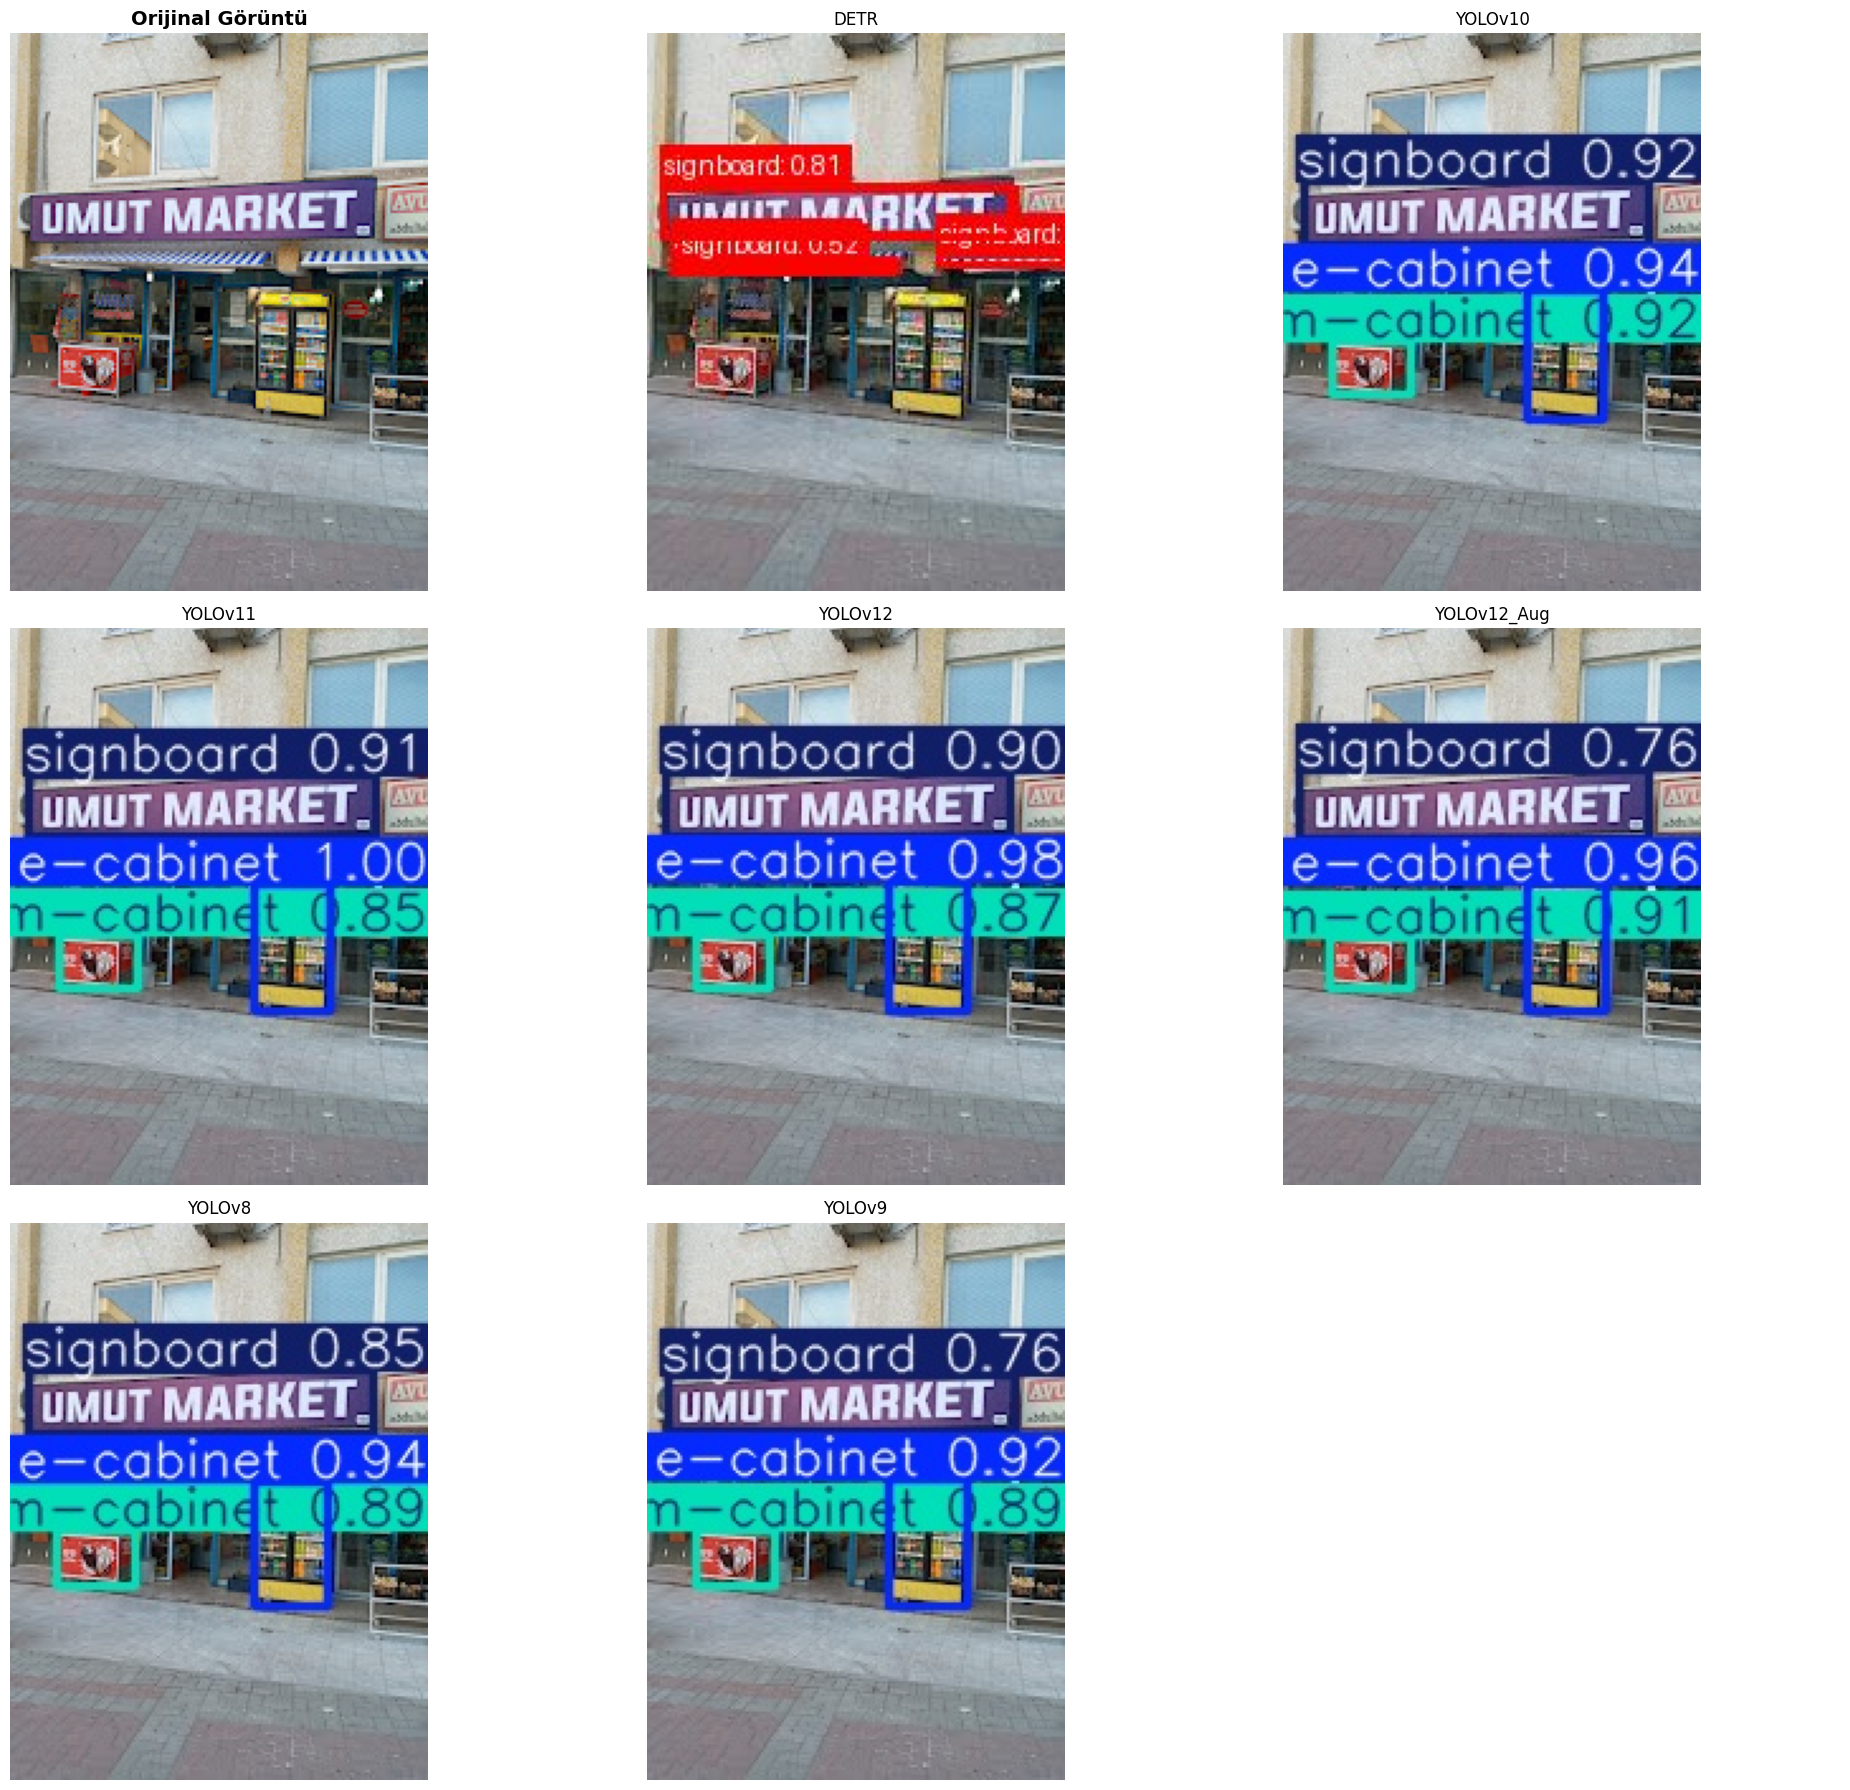

✅ Comparison file is saved: /content/model_comparison_results/model_comparison.png

🎉 Demo is completed!


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import shutil
from PIL import Image, ImageDraw, ImageFont
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection

drive.mount('/content/drive')

!pip install -q ultralytics transformers

def run_yolo_model(model_name, model_path, test_image_path, confidence, results_dir):

    print(f"\n⏳ {model_name} model is running...")

    if os.path.exists(model_path):
        output_name = f"{model_name}_predict"
        !yolo task=detect mode=predict model={model_path} source={test_image_path} conf={confidence} save=True name={output_name} exist_ok=True

        print(f"✅ {model_name} has been completed")

        source_path = f"/content/runs/detect/{output_name}"
        if os.path.exists(source_path):
            dest_path = f"{results_dir}/{model_name}"
            shutil.copytree(source_path, dest_path, dirs_exist_ok=True)
    else:
        print(f"❌ {model_name} model folder could not be found: {model_path}")

def run_detr_model(test_image_path, confidence, results_dir):

    print(f"\n⏳ DETR model is running...")

    detr_model_path = "/content/drive/MyDrive/DETR_Results/detr-market-finetuned-best"

    if os.path.exists(detr_model_path):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        processor = DetrImageProcessor.from_pretrained(detr_model_path)
        model = DetrForObjectDetection.from_pretrained(detr_model_path).to(device)
        image_pil = Image.open(test_image_path).convert("RGB")
        inputs = processor(images=image_pil, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = model(**inputs)

        target_sizes = torch.tensor([image_pil.size[::-1]])
        results = processor.post_process_object_detection(
            outputs,
            target_sizes=target_sizes,
            threshold=confidence
        )[0]

        draw = ImageDraw.Draw(image_pil)

        for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
            x1, y1, x2, y2 = [int(coord) for coord in box.tolist()]
            label_text = model.config.id2label[label.item()]
            confidence_score = score.item()
            draw.rectangle([(x1, y1), (x2, y2)], outline="red", width=3)
            label_with_conf = f"{label_text}: {confidence_score:.2f}"

            try:
                font = ImageFont.truetype("arial.ttf", 15)
            except IOError:
                font = ImageFont.load_default()

            text_bbox = draw.textbbox((0, 0), label_with_conf, font=font)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]

            draw.rectangle([(x1, y1 - text_height - 5), (x1 + text_width + 4, y1)], fill="red")
            draw.text((x1 + 2, y1 - text_height - 3), label_with_conf, fill="white", font=font)

        detr_results_dir = f"{results_dir}/DETR"
        os.makedirs(detr_results_dir, exist_ok=True)
        output_filename = os.path.basename(test_image_path)
        image_pil.save(f"{detr_results_dir}/{output_filename}")

        print(f"✅ DETR has been completed")
    else:
        print(f"❌ DETR model folder could not be found: {detr_model_path}")

def visualize_all_results(results_dir, original_image_path):

    print("\n📊 Results are visualizing...")
    model_results = {}

    original_image_name = os.path.basename(original_image_path)

    for model_name in sorted(os.listdir(results_dir)):
        model_dir = os.path.join(results_dir, model_name)
        if os.path.isdir(model_dir):
            predicted_image_path = os.path.join(model_dir, original_image_name)
            if os.path.exists(predicted_image_path):
                model_results[model_name] = predicted_image_path
            else:
                image_paths_generator = (
                    os.path.join(root, file)
                    for root, _, files in os.walk(model_dir)
                    for file in files if file.endswith(('.jpg', '.png', '.jpeg'))
                )
                first_image_found = next(image_paths_generator, None)
                if first_image_found:
                    model_results[model_name] = first_image_found

    total_images = len(model_results) + 1
    cols = 3
    rows = (total_images + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
    axes = axes.flatten()

    original_img = Image.open(original_image_path)
    axes[0].imshow(original_img)
    axes[0].set_title("Orijinal Görüntü", fontsize=14, fontweight='bold')
    axes[0].axis('off')

    model_names = list(model_results.keys())

    for i, model_name in enumerate(model_names):
        ax = axes[i + 1]
        try:
            img = Image.open(model_results[model_name])
            ax.imshow(img)
            ax.set_title(model_name, fontsize=12)
        except (KeyError, FileNotFoundError):
            ax.set_title(f"{model_name}\n(Sonuç bulunamadı)", fontsize=12)
        ax.axis('off')

    for i in range(len(model_names) + 1, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()

    comparison_path = f"{results_dir}/model_comparison.png"
    plt.savefig(comparison_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"✅ Comparison file is saved: {comparison_path}")

def model_comparison_demo():

    print("🚀 OBJECT DETECTION MODELS COMPARISON DEMO")

    yolo_models = {
        "YOLOv8": "/content/drive/MyDrive/YOLOv8_Results/weights/best.pt",
        "YOLOv9": "/content/drive/MyDrive/YOLOv9_Results/weights/best.pt",
        "YOLOv10": "/content/drive/MyDrive/YOLOv10_Results/weights/best.pt",
        "YOLOv11": "/content/drive/MyDrive/YOLOv11_Results/weights/best.pt",
        "YOLOv12": "/content/drive/MyDrive/YOLOv12_Results/weights/best.pt",
        "YOLOv12_Aug": "/content/drive/MyDrive/YOLOv12_Augmented_Results/weights/best.pt"
    }

    print("\n📷 Please upload the test photo:")
    uploaded = files.upload()

    if not uploaded:
        print("❌ Photo can not be uploaded.")
        return

    test_image_name = list(uploaded.keys())[0]

    test_dir = "/content/test_images"
    if os.path.exists(test_dir):
        shutil.rmtree(test_dir)
    os.makedirs(test_dir, exist_ok=True)

    test_image_path = os.path.join(test_dir, test_image_name)
    shutil.move(test_image_name, test_image_path)

    print(f"\n✅ '{test_image_name}' file is loaded successfully!")

    confidence = 0.5

    results_dir = "/content/model_comparison_results"
    if os.path.exists(results_dir):
        shutil.rmtree(results_dir)
    os.makedirs(results_dir, exist_ok=True)

    print("\n🔍 Model predictions are starting...")

    for model_name, model_path in yolo_models.items():
        run_yolo_model(model_name, model_path, test_image_path, confidence, results_dir)

    run_detr_model(test_image_path, confidence, results_dir)

    visualize_all_results(results_dir, test_image_path)

    drive_results_path = "/content/drive/MyDrive/Model_Comparison_Demo_Results"
    if os.path.exists(drive_results_path):
        shutil.rmtree(drive_results_path)
    shutil.copytree(results_dir, drive_results_path, dirs_exist_ok=False)

    print("\n🎉 Demo is completed!")

if __name__ == "__main__":
    model_comparison_demo()